<a href="https://colab.research.google.com/github/mursaleenfaroha-rgb/bird-vs-drone-classifier/blob/main/Aerial_Object_Classification_%26_Detection(faroha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :** Aerial Object Classification & Detection

**Project Type :**

"Built and deployed a CNN-based image classifier to distinguish birds from drones using Streamlit and TensorFlow."



**Contribution :** Individual

# **GITHUB LINK:**

https://github.com/mursaleenfaroha-rgb/bird-vs-drone-classifier.git

# **Project Summary :**


 Bird vs Drone Classification & Detection

This project aims to classify aerial images into two categories—**Bird** or **Drone**—and optionally detect them using YOLOv8. It supports real-time applications like wildlife protection, airspace safety, and surveillance.

**Tech Stack**: Python, TensorFlow/Keras, YOLOv8, Streamlit  
**Tools**: Google Colab, OpenCV, Matplotlib  
**Deadline**: 28 Nov 2025

# **Problem Statement:**

**This project aims to develop a deep learning-based solution that can classify aerial images into two categories — Bird or Drone — and optionally perform object detection to locate and label these objects in real-world scenes.
The solution will help in security surveillance, wildlife protection, and airspace safety where accurate identification between drones and birds is critical. The project involves building a Custom CNN classification model, leveraging transfer learning, and optionally implementing YOLOv8 for real-time object detection. The final solution will be deployed using Streamlit for interactive use.**

# ***Let's Begin !***

**⚙️ Environment Setup**

**We install all required libraries including TensorFlow, and OpenCV.**

In [ ]:
# Install core libraries
!pip install ultralytics tensorflow opencv-python matplotlib

# Check GPU availability
import torch
print("GPU available:", torch.cuda.is_available())


GPU available: False


## Dataset Preparation

**We begin by loading and inspecting the dataset. This includes checking the folder structure, counting images per class, and visualizing a few samples to understand the data distribution.**

In [ ]:
# Set dataset path
dataset_path = "/content/drive/MyDrive/classification_dataset"



TRAIN SET:
  drone: 1248 images
  bird: 1414 images

VALID SET:
  bird: 217 images
  drone: 225 images

TEST SET:
  bird: 121 images
  drone: 94 images


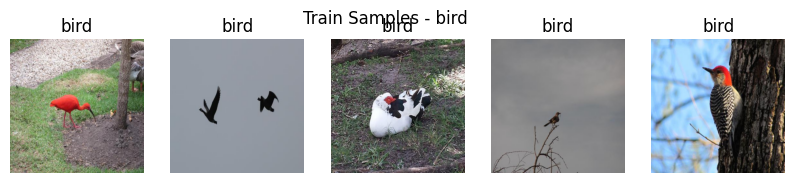

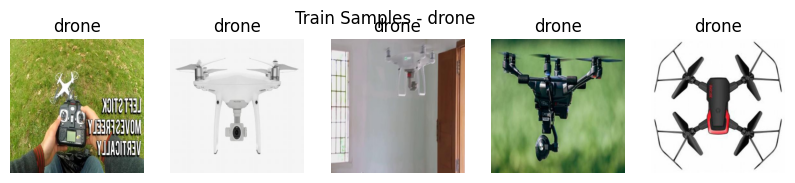

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/MyDrive/classification_dataset"

# Check folder structure
for split in ['train', 'valid', 'test']:
    print(f"\n{split.upper()} SET:")
    for cls in os.listdir(os.path.join(dataset_path, split)):
        cls_path = os.path.join(dataset_path, split, cls)
        count = len(os.listdir(cls_path))
        print(f"  {cls}: {count} images")

# Visualize sample images
def show_samples(split, class_name):
    path = os.path.join(dataset_path, split, class_name)
    images = os.listdir(path)[:5]
    plt.figure(figsize=(10, 2))
    for i, img_name in enumerate(images):
        img = cv2.imread(os.path.join(path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.suptitle(f"{split.capitalize()} Samples - {class_name}")
    plt.show()

show_samples('train', 'bird')
show_samples('train', 'drone')

# **Preprocessing**

We prepare our dataset for training by resizing all images to **224×224**, normalizing pixel values to the range **[0, 1]**, and applying basic augmentation techniques. This helps the model generalize better and reduces overfitting.

We use `ImageDataGenerator` to:
- Rescale pixel values
- Load images from folders
- Apply augmentation (optional)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator for training, validation, and testing
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    dataset_path + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    dataset_path + "/valid",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_directory(
    dataset_path + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


## **Build Custom CNN Model**

We design a simple Convolutional Neural Network (CNN) to learn visual patterns that distinguish birds from drones.  
The model includes convolutional layers for feature extraction, pooling layers for downsampling, and dense layers for classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model using Input() for best practice
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')# Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## **Train the Model**


We train our CNN using the training and validation generators.  
The model learns to distinguish between bird and drone images based on visual features.  
We track accuracy and loss over 10 epochs.

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 897s 11s/step - accuracy: 0.6373 - loss: 1.0031 - val_accuracy: 0.7285 - val_loss: 0.5489
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7855 - loss: 0.4594 - val_accuracy: 0.7783 - val_loss: 0.5135
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8808 - loss: 0.2908 - val_accuracy: 0.8077 - val_loss: 0.5381
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9232 - loss: 0.1828 - val_accuracy: 0.8054 - val_loss: 0.5539
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9538 - loss: 0.1276 - val_accuracy: 0.7760 - val_loss: 0.7105
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9741 - loss: 0.0764 - val_accuracy: 0.7896 - val_loss: 0.8806
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9723 - loss: 0.0741 - val_accuracy: 0.8122 - val_loss: 0.8644
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9877 - loss: 0.0333 - val_accuracy: 0.7873 - 

## **Visualize Accuracy & Loss**

We plot training and validation accuracy and loss to understand how well the model is learning.  
This helps us detect overfitting, underfitting, and overall performance trends.

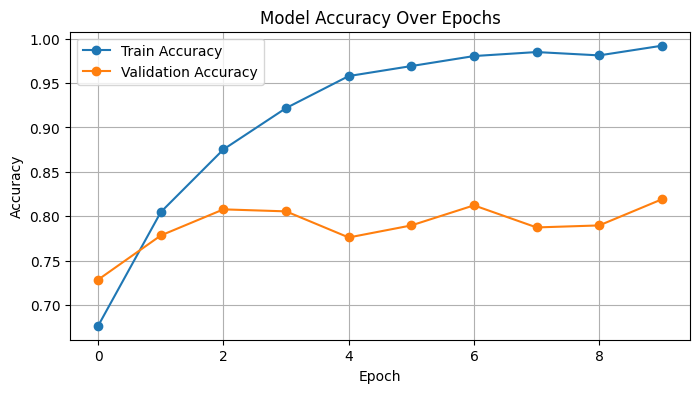

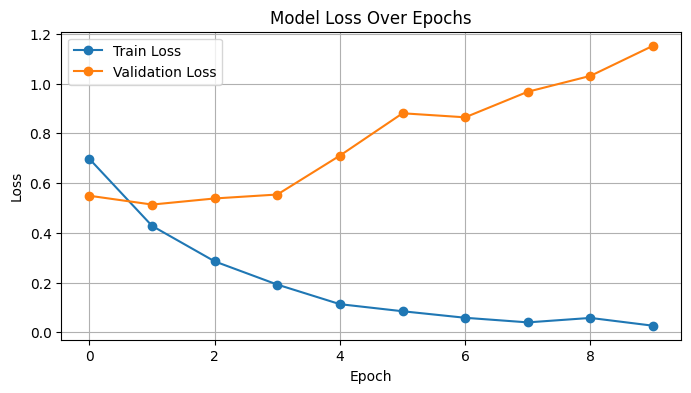

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## **Evaluate on Test Set**

We use the test generator to evaluate our model’s performance on unseen images.  
This gives us a final accuracy score and helps us understand how well the model generalizes.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
predictions = model.predict(test_gen)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# True labels
true_labels = test_gen.classes

# Accuracy & Report
print("Test Accuracy:", accuracy_score(true_labels, predicted_labels))
print("Test Loss:", accuracy_score(true_labels, predicted_labels))
print(classification_report(true_labels, predicted_labels, target_names=['Bird', 'Drone']))

7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 8s/step
Test Accuracy: 0.8372093023255814
Test Loss: 0.8372093023255814
              precision    recall  f1-score   support

        Bird       0.82      0.91      0.86       121
       Drone       0.86      0.74      0.80        94

    accuracy                           0.84       215
   macro avg       0.84      0.83      0.83       215
weighted avg       0.84      0.84      0.84       215



##  **Visualizing Data Augmentation for both bird and drone**

To improve generalization and reduce overfitting, we apply data augmentation using `ImageDataGenerator`.  
This creates new variations of training images by rotating, zooming, flipping, and adjusting brightness.  
We visualize a few augmented samples to inspect the transformations.

Found 2662 images belonging to 2 classes.


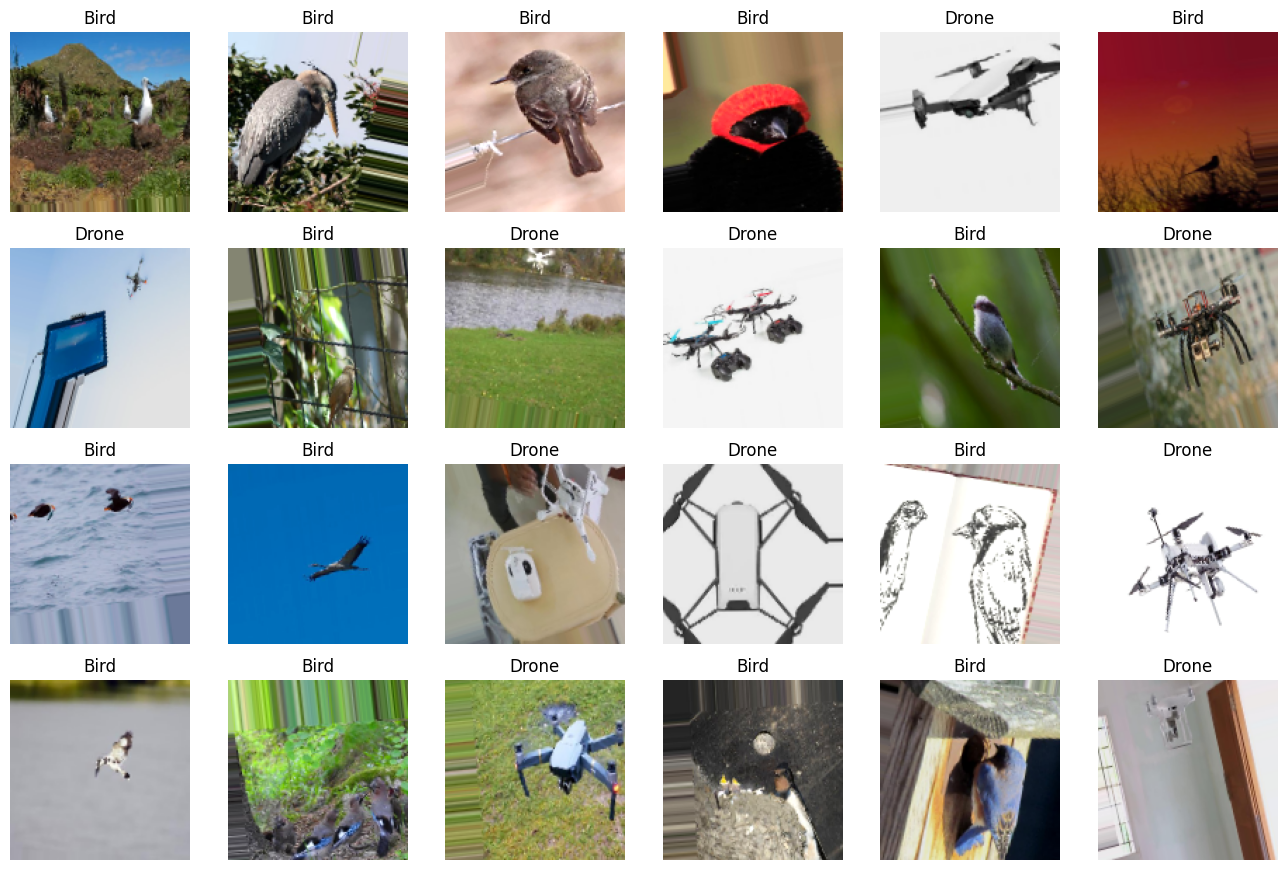

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set your training directory (update if different)
train_dir = "/content/drive/MyDrive/classification_dataset/train"

# Augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

# Create a generator that will yield augmented batches
preview_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=24,      # number of images to preview
    class_mode='categorical',
    shuffle=True
)

# Fetch one augmented batch
images, labels = next(preview_generator)

# Plot the batch in a grid
cols = 6
rows = int(np.ceil(len(images) / cols))
plt.figure(figsize=(cols * 2.2, rows * 2.2))

# Map class indices to names for titles
class_indices = preview_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    label_idx = np.argmax(labels[i])
    plt.title(idx_to_class[label_idx].capitalize())
    plt.axis('off')

plt.tight_layout()
plt.show()

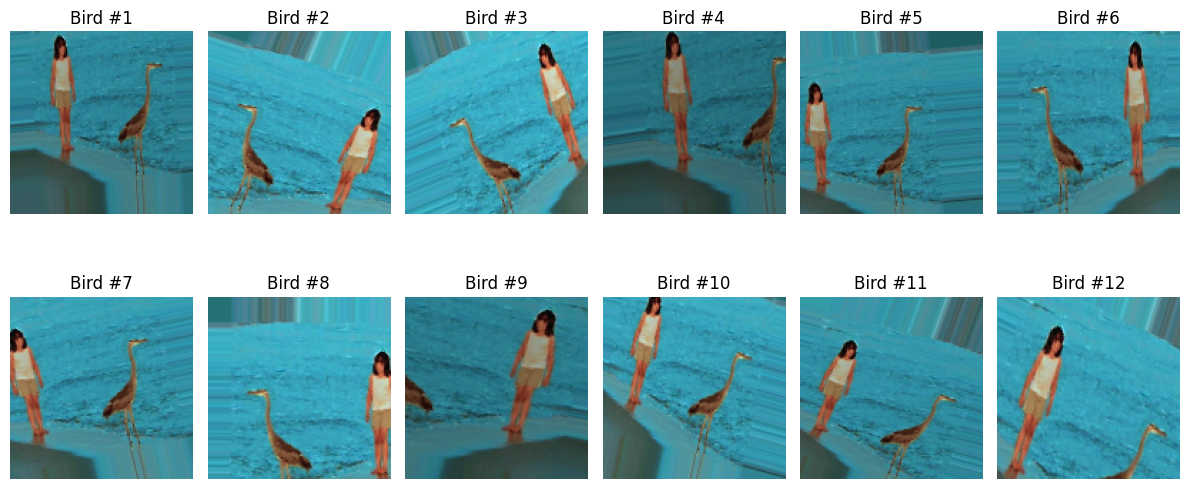

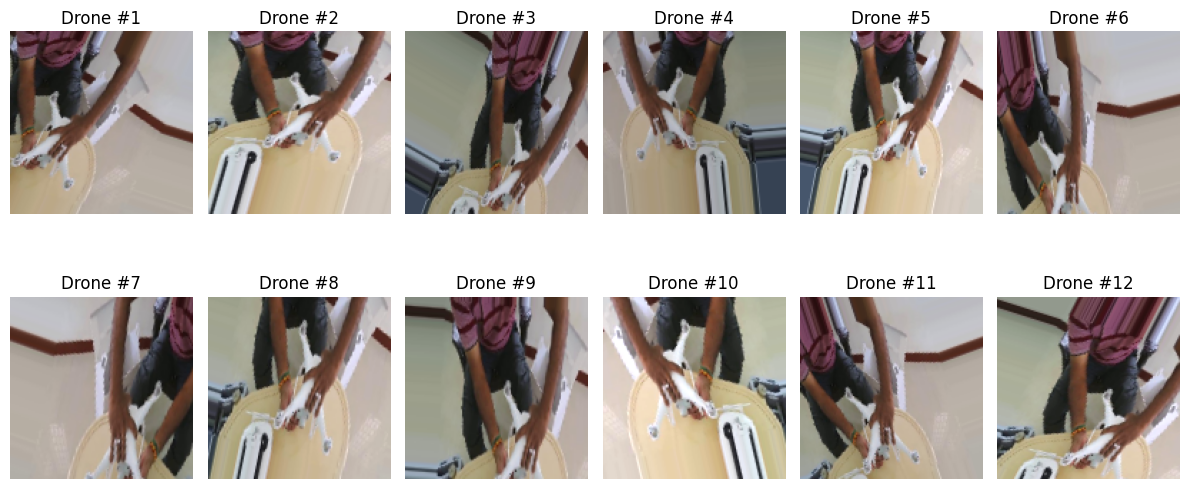

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Update these to point to one Bird image and one Drone image in your train set
bird_img_path = "/content/drive/MyDrive/classification_dataset/test/bird/0a7e246b483ed57b_jpg.rf.446903614d856f120545c0fc350c2209.jpg"
drone_img_path = "/content/drive/MyDrive/classification_dataset/test/drone/foto01799_png.rf.7b06ce6abb9f307efa437ed34e863e21.jpg"


single_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=(0.8, 1.25),
    fill_mode='nearest'
)

def show_augmentations(img_path, n=12, title_prefix=""):
    img = load_img(img_path, target_size=(128, 128))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # shape (1, 128, 128, 3)

    aug_iter = single_datagen.flow(x, batch_size=1)
    plt.figure(figsize=(12, 6))
    cols = 6
    rows = int(np.ceil(n / cols))
    for i in range(n):
        aug_img = next(aug_iter)[0]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(aug_img)
        plt.title(f"{title_prefix} #{i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Preview augmentations
show_augmentations(bird_img_path, n=12, title_prefix="Bird")
show_augmentations(drone_img_path, n=12, title_prefix="Drone")

## **Predict & Visualize Bird vs Drone Classification**

We use our trained model to make predictions on test images.  
Each image is classified as either a **bird** or a **drone** based on a threshold of 0.5.  
We visualize a few predictions to inspect model performance.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/drive/MyDrive/classification_dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 215 images belonging to 2 classes.


Found 215 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


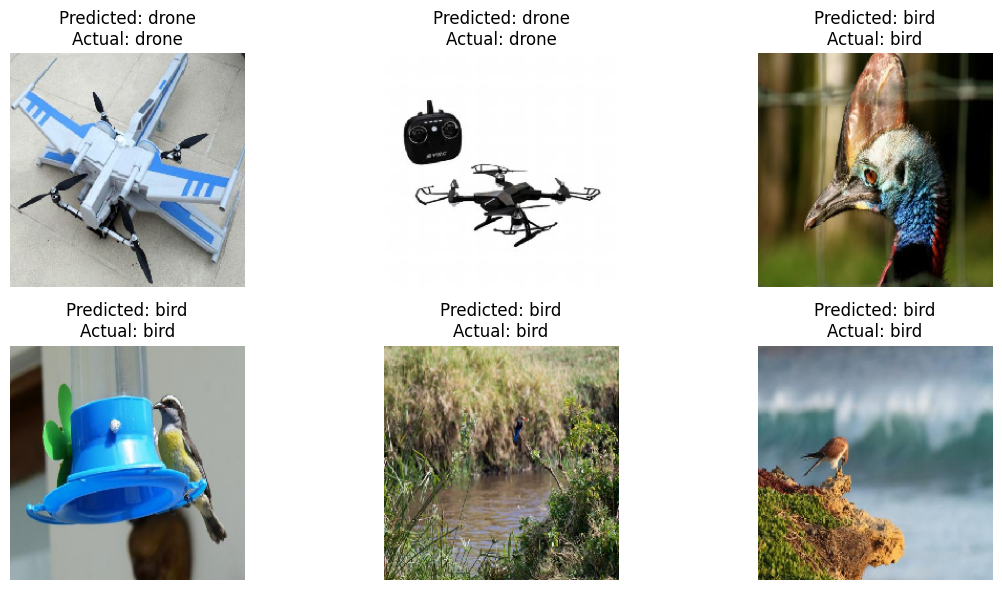

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Recreate test_data generator with correct image size
test_dir = "/content/drive/MyDrive/classification_dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # match your model's input shape
    batch_size=32,
    class_mode='binary',     # match your model's output
    shuffle=True
)

# Get a batch of test images
test_images, test_labels = next(iter(test_data))

# Predict using the trained model
predictions = model.predict(test_images)

# Map class indices to names
class_indices = test_data.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Visualize predictions
plt.figure(figsize=(12, 6))
for i in range(6):  # Show 6 predictions
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i])
    pred_label = idx_to_class[int(predictions[i][0] > 0.5)]
    true_label = idx_to_class[int(test_labels[i])]
    plt.title(f"Predicted: {pred_label}\nActual: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model.save("bird_vs_drone_model.keras")

# **Deploy CNN with Streamlit**

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.5 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

136.113.54.19


In [64]:
%%writefile app.py
import streamlit as st
from tensorflow import keras
import numpy as np
from PIL import Image
import gdown
import os

# Download model from Google Drive (only once)
model_path = "bird_vs_drone_model.keras"
if not os.path.exists(model_path):
    url = "https://drive.google.com/uc?id=11-yOcHcaHrp98JdrRAc1t9kSd1pCo5aw"
    gdown.download(url, model_path, quiet=False)

# Load your trained model
model = keras.models.load_model(model_path)

# Map prediction to label
idx_to_class = {0: "bird", 1: "drone"}

# Title
st.title("🕊️ Bird vs Drone Classifier")

# Upload image
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = image.resize((224, 224))  # match your model's input size
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 3)

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = "drone" if prediction > 0.5 else "bird"
    confidence = prediction if label == "drone" else 1 - prediction

    # Show result
    st.markdown(f"### Prediction: **{label.upper()}**")
    st.markdown(f"Confidence: **{confidence:.2f}**")

Overwriting app.py


In [65]:
!ls -lah

total 274M
drwxr-xr-x 1 root root 4.0K Nov 28 13:13 .
drwxr-xr-x 1 root root 4.0K Nov 28 08:43 ..
-rw-r--r-- 1 root root 1.4K Nov 28 13:55 app.py
-rw-r--r-- 1 root root 274M Nov 28 09:39 bird_vs_drone_model.keras
drwxr-xr-x 4 root root 4.0K Nov 20 14:30 .config
drwx------ 5 root root 4.0K Nov 28 08:47 drive
drwxr-xr-x 2 root root 4.0K Nov 28 13:13 .ipynb_checkpoints
-rw-r--r-- 1 root root   52 Nov 28 13:29 requirements.txt
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [66]:
!ls -lah bird_vs_drone_model.keras

-rw-r--r-- 1 root root 274M Nov 28 09:39 bird_vs_drone_model.keras


In [75]:
%%writefile requirements.txt
streamlit
tensorflow-cpu==2.20.0
numpy
Pillow
gdown


Overwriting requirements.txt


In [76]:
!ls -lah requirements.txt

-rw-r--r-- 1 root root 52 Nov 28 14:36 requirements.txt


In [77]:
from google.colab import files
files.download("app.py")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
from google.colab import files
files.download("bird_vs_drone_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
import tensorflow as tf
print(tf.__version__)

2.19.0


#  **## ✅ Deployment Summary**

- The trained CNN model was saved in `.keras` format.
- The model was deployed using **Streamlit Cloud**.
- The app allows users to upload an image and predicts whether it contains a **bird** or a **drone**.
- The interface is simple, intuitive, and includes confidence scores.

> Note: The model is hosted via Google Drive and downloaded dynamically using `gdown`.

### **🔗 LIVE DEMO**
# **Try the deployed app here: [Bird vs Drone Classifier]**

https://bird-vs-drone-classifier-4raeuohpt4bxhmvybj6eee.streamlit.app/

# **GOOGLE DRIVE LINK:**

https://drive.google.com/drive/folders/1UhERI06oZ9RoV-o7W6tRNUwyiPUM3kRj?usp=sharing

# **------THANK YOU-------**